In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Prepare dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1307,std=0.3081)])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=False,transform=transform)  #Make download == True to download dataset
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=False,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

In [4]:
data__ = enumerate(train_loader)
batch_id , (images,labels) = next(data__)

In [5]:
images.shape

torch.Size([32, 1, 28, 28])

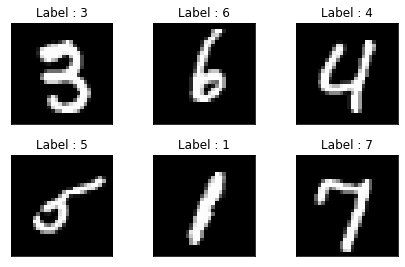

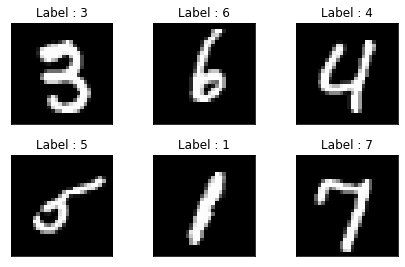

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
# Building neural net
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [34]:
# Training nn

model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 200

since = time.time()

gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradien_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        


Epoch 0/199
----------



tensor(2.1282, device='cuda:0')
Epoch 1/199
----------



tensor(2.6161, device='cuda:0')
Epoch 2/199
----------



tensor(0.6350, device='cuda:0')
Epoch 3/199
----------



tensor(1.2881, device='cuda:0')
Epoch 4/199
----------



tensor(2.4468, device='cuda:0')
Epoch 5/199
----------



tensor(1.7415, device='cuda:0')
Epoch 6/199
----------



tensor(0.2597, device='cuda:0')
Epoch 7/199
----------



tensor(0.8038, device='cuda:0')
Epoch 8/199
----------



tensor(2.2151, device='cuda:0')
Epoch 9/199
----------



tensor(0.1680, device='cuda:0')
Epoch 10/199
----------



tensor(1.1488, device='cuda:0')
Epoch 11/199
----------



tensor(0.0709, device='cuda:0')
Epoch 12/199
----------



tensor(0.0706, device='cuda:0')
Epoch 13/199
----------



tensor(1.2933, device='cuda:0')
Epoch 14/199
----------



tensor(2.8717, device='cuda:0')
Epoch 15/199
----------



tensor(0.0428, device='cuda:0')
Epoch 16/199
----------



tensor(0.8688, device='cuda:0')
Epoch 17/199
----------



tensor(2.1026, device='cuda:0')
Epoch 18/199
----------



tensor(0.2316, device='cuda:0')
Epoch 19/199
----------



tensor(0.9034, device='cuda:0')
Epoch 20/199
----------



tensor(0.1688, device='cuda:0')
Epoch 21/199
----------



tensor(0.1307, device='cuda:0')
Epoch 22/199
----------



tensor(0.9681, device='cuda:0')
Epoch 23/199
----------



tensor(1.5455, device='cuda:0')
Epoch 24/199
----------



tensor(0.5760, device='cuda:0')
Epoch 25/199
----------



tensor(2.0519, device='cuda:0')
Epoch 26/199
----------



tensor(0.2860, device='cuda:0')
Epoch 27/199
----------



tensor(0.0344, device='cuda:0')
Epoch 28/199
----------



tensor(3.4421, device='cuda:0')
Epoch 29/199
----------



tensor(0.0906, device='cuda:0')
Epoch 30/199
----------



tensor(2.5845, device='cuda:0')
Epoch 31/199
----------



tensor(3.3883, device='cuda:0')
Epoch 32/199
----------



tensor(0.8093, device='cuda:0')
Epoch 33/199
----------



tensor(3.2990, device='cuda:0')
Epoch 34/199
----------



tensor(1.7480, device='cuda:0')
Epoch 35/199
----------



tensor(0.5015, device='cuda:0')
Epoch 36/199
----------



tensor(2.3362, device='cuda:0')
Epoch 37/199
----------



tensor(0.0902, device='cuda:0')
Epoch 38/199
----------



tensor(0.3756, device='cuda:0')
Epoch 39/199
----------



tensor(1.3757, device='cuda:0')
Epoch 40/199
----------



tensor(5.0932, device='cuda:0')
Epoch 41/199
----------



tensor(0.1180, device='cuda:0')
Epoch 42/199
----------



tensor(0.4658, device='cuda:0')
Epoch 43/199
----------



tensor(0.0043, device='cuda:0')
Epoch 44/199
----------



tensor(0.9736, device='cuda:0')
Epoch 45/199
----------



tensor(0.2244, device='cuda:0')
Epoch 46/199
----------



tensor(0.0057, device='cuda:0')
Epoch 47/199
----------



tensor(0.0513, device='cuda:0')
Epoch 48/199
----------



tensor(0.0036, device='cuda:0')
Epoch 49/199
----------



tensor(0.4977, device='cuda:0')
Epoch 50/199
----------



tensor(0.4146, device='cuda:0')
Epoch 51/199
----------



tensor(0.6781, device='cuda:0')
Epoch 52/199
----------



tensor(0.1269, device='cuda:0')
Epoch 53/199
----------



tensor(0.4688, device='cuda:0')
Epoch 54/199
----------



tensor(0.0731, device='cuda:0')
Epoch 55/199
----------



tensor(0.0594, device='cuda:0')
Epoch 56/199
----------



tensor(1.7864, device='cuda:0')
Epoch 57/199
----------



tensor(3.5163, device='cuda:0')
Epoch 58/199
----------



tensor(0.4808, device='cuda:0')
Epoch 59/199
----------



tensor(0.0509, device='cuda:0')
Epoch 60/199
----------



tensor(0.2405, device='cuda:0')
Epoch 61/199
----------



tensor(0.0248, device='cuda:0')
Epoch 62/199
----------



tensor(0.6634, device='cuda:0')
Epoch 63/199
----------



tensor(0.0003, device='cuda:0')
Epoch 64/199
----------



tensor(5.3215, device='cuda:0')
Epoch 65/199
----------



tensor(0.2435, device='cuda:0')
Epoch 66/199
----------



tensor(2.0469, device='cuda:0')
Epoch 67/199
----------



tensor(0.0035, device='cuda:0')
Epoch 68/199
----------



tensor(0.0104, device='cuda:0')
Epoch 69/199
----------



tensor(0.0009, device='cuda:0')
Epoch 70/199
----------



tensor(0.0162, device='cuda:0')
Epoch 71/199
----------



tensor(0.0002, device='cuda:0')
Epoch 72/199
----------



tensor(0.3261, device='cuda:0')
Epoch 73/199
----------



tensor(0.0001, device='cuda:0')
Epoch 74/199
----------



tensor(0.0002, device='cuda:0')
Epoch 75/199
----------



tensor(0.8688, device='cuda:0')
Epoch 76/199
----------



tensor(0.4366, device='cuda:0')
Epoch 77/199
----------



tensor(1.5578e-05, device='cuda:0')
Epoch 78/199
----------



tensor(0.4041, device='cuda:0')
Epoch 79/199
----------



tensor(0.0005, device='cuda:0')
Epoch 80/199
----------



tensor(0.1773, device='cuda:0')
Epoch 81/199
----------



tensor(0.0013, device='cuda:0')
Epoch 82/199
----------



tensor(0.0016, device='cuda:0')
Epoch 83/199
----------



tensor(0.0068, device='cuda:0')
Epoch 84/199
----------



tensor(0.0481, device='cuda:0')
Epoch 85/199
----------



tensor(0.0118, device='cuda:0')
Epoch 86/199
----------



tensor(2.6581, device='cuda:0')
Epoch 87/199
----------



tensor(0.0032, device='cuda:0')
Epoch 88/199
----------



tensor(0.3632, device='cuda:0')
Epoch 89/199
----------



tensor(2.6410, device='cuda:0')
Epoch 90/199
----------



tensor(0.0012, device='cuda:0')
Epoch 91/199
----------



tensor(0.0091, device='cuda:0')
Epoch 92/199
----------



tensor(0.0025, device='cuda:0')
Epoch 93/199
----------



tensor(0.0817, device='cuda:0')
Epoch 94/199
----------



tensor(5.6768, device='cuda:0')
Epoch 95/199
----------



tensor(2.3910, device='cuda:0')
Epoch 96/199
----------



tensor(0.4941, device='cuda:0')
Epoch 97/199
----------



tensor(0.0165, device='cuda:0')
Epoch 98/199
----------



tensor(1.5022, device='cuda:0')
Epoch 99/199
----------



tensor(0.0014, device='cuda:0')
Epoch 100/199
----------



tensor(0.1449, device='cuda:0')
Epoch 101/199
----------



tensor(0.0532, device='cuda:0')
Epoch 102/199
----------



tensor(5.4652, device='cuda:0')
Epoch 103/199
----------



tensor(5.6908, device='cuda:0')
Epoch 104/199
----------



tensor(0.1417, device='cuda:0')
Epoch 105/199
----------



tensor(0.0097, device='cuda:0')
Epoch 106/199
----------



tensor(0.0041, device='cuda:0')
Epoch 107/199
----------



tensor(0.0249, device='cuda:0')
Epoch 108/199
----------



tensor(4.3099e-06, device='cuda:0')
Epoch 109/199
----------



tensor(0.0299, device='cuda:0')
Epoch 110/199
----------



tensor(0.0002, device='cuda:0')
Epoch 111/199
----------



tensor(0.0009, device='cuda:0')
Epoch 112/199
----------



tensor(0.0228, device='cuda:0')
Epoch 113/199
----------



tensor(6.7602e-06, device='cuda:0')
Epoch 114/199
----------



tensor(0.4770, device='cuda:0')
Epoch 115/199
----------



tensor(2.2497, device='cuda:0')
Epoch 116/199
----------



tensor(0.1257, device='cuda:0')
Epoch 117/199
----------



tensor(3.5089e-05, device='cuda:0')
Epoch 118/199
----------



tensor(3.8119, device='cuda:0')
Epoch 119/199
----------



tensor(0.0025, device='cuda:0')
Epoch 120/199
----------



tensor(6.5387e-05, device='cuda:0')
Epoch 121/199
----------



tensor(0.1478, device='cuda:0')
Epoch 122/199
----------



tensor(7.1300e-06, device='cuda:0')
Epoch 123/199
----------



tensor(0.0100, device='cuda:0')
Epoch 124/199
----------



tensor(0.0151, device='cuda:0')
Epoch 125/199
----------



tensor(0.1389, device='cuda:0')
Epoch 126/199
----------



tensor(0.9704, device='cuda:0')
Epoch 127/199
----------



tensor(0.0036, device='cuda:0')
Epoch 128/199
----------



tensor(8.7926, device='cuda:0')
Epoch 129/199
----------



tensor(0.5945, device='cuda:0')
Epoch 130/199
----------



tensor(7.1540e-06, device='cuda:0')
Epoch 131/199
----------



tensor(1.3882, device='cuda:0')
Epoch 132/199
----------



tensor(0.0001, device='cuda:0')
Epoch 133/199
----------



tensor(5.4501, device='cuda:0')
Epoch 134/199
----------



tensor(0.1423, device='cuda:0')
Epoch 135/199
----------



tensor(0.0144, device='cuda:0')
Epoch 136/199
----------



tensor(0.0074, device='cuda:0')
Epoch 137/199
----------



tensor(0.0413, device='cuda:0')
Epoch 138/199
----------



tensor(6.3324, device='cuda:0')
Epoch 139/199
----------



tensor(0.6195, device='cuda:0')
Epoch 140/199
----------



tensor(0.0004, device='cuda:0')
Epoch 141/199
----------



tensor(0.0007, device='cuda:0')
Epoch 142/199
----------



tensor(0.5116, device='cuda:0')
Epoch 143/199
----------



tensor(0.0570, device='cuda:0')
Epoch 144/199
----------



tensor(0.0006, device='cuda:0')
Epoch 145/199
----------



tensor(4.2012, device='cuda:0')
Epoch 146/199
----------



tensor(4.6020e-06, device='cuda:0')
Epoch 147/199
----------



tensor(2.4069, device='cuda:0')
Epoch 148/199
----------



tensor(0.0005, device='cuda:0')
Epoch 149/199
----------



tensor(7.2208e-05, device='cuda:0')
Epoch 150/199
----------



tensor(0.0039, device='cuda:0')
Epoch 151/199
----------



tensor(0.0099, device='cuda:0')
Epoch 152/199
----------



tensor(1.7566e-05, device='cuda:0')
Epoch 153/199
----------



tensor(0.5624, device='cuda:0')
Epoch 154/199
----------



tensor(9.5290e-06, device='cuda:0')
Epoch 155/199
----------



tensor(5.0959, device='cuda:0')
Epoch 156/199
----------



tensor(0.1229, device='cuda:0')
Epoch 157/199
----------



tensor(1.6359e-05, device='cuda:0')
Epoch 158/199
----------



tensor(0.0470, device='cuda:0')
Epoch 159/199
----------



tensor(1.7692, device='cuda:0')
Epoch 160/199
----------



tensor(0.0225, device='cuda:0')
Epoch 161/199
----------



tensor(1.4994e-07, device='cuda:0')
Epoch 162/199
----------



tensor(0.0090, device='cuda:0')
Epoch 163/199
----------



tensor(3.4366e-06, device='cuda:0')
Epoch 164/199
----------



tensor(2.5605, device='cuda:0')
Epoch 165/199
----------



tensor(0.0034, device='cuda:0')
Epoch 166/199
----------



tensor(0.0011, device='cuda:0')
Epoch 167/199
----------



tensor(0.0003, device='cuda:0')
Epoch 168/199
----------



tensor(5.4719, device='cuda:0')
Epoch 169/199
----------



tensor(0.0020, device='cuda:0')
Epoch 170/199
----------



tensor(1.3019e-05, device='cuda:0')
Epoch 171/199
----------



tensor(0.4673, device='cuda:0')
Epoch 172/199
----------



tensor(0.0091, device='cuda:0')
Epoch 173/199
----------



tensor(7.4880e-05, device='cuda:0')
Epoch 174/199
----------



tensor(0.0884, device='cuda:0')
Epoch 175/199
----------



tensor(0.0002, device='cuda:0')
Epoch 176/199
----------



tensor(0.0243, device='cuda:0')
Epoch 177/199
----------



tensor(0.2543, device='cuda:0')
Epoch 178/199
----------



tensor(0.0251, device='cuda:0')
Epoch 179/199
----------



tensor(1.3844, device='cuda:0')
Epoch 180/199
----------



tensor(0.3731, device='cuda:0')
Epoch 181/199
----------



tensor(0.0211, device='cuda:0')
Epoch 182/199
----------



tensor(2.4604e-08, device='cuda:0')
Epoch 183/199
----------



tensor(0.0059, device='cuda:0')
Epoch 184/199
----------



tensor(0.0257, device='cuda:0')
Epoch 185/199
----------



tensor(4.6928e-06, device='cuda:0')
Epoch 186/199
----------



tensor(6.3172e-05, device='cuda:0')
Epoch 187/199
----------



tensor(4.6267e-06, device='cuda:0')
Epoch 188/199
----------



tensor(1.2303, device='cuda:0')
Epoch 189/199
----------



tensor(0.0005, device='cuda:0')
Epoch 190/199
----------



tensor(0.0004, device='cuda:0')
Epoch 191/199
----------



tensor(0.0433, device='cuda:0')
Epoch 192/199
----------



tensor(1.4984, device='cuda:0')
Epoch 193/199
----------



tensor(6.2248e-05, device='cuda:0')
Epoch 194/199
----------



tensor(0.0161, device='cuda:0')
Epoch 195/199
----------



tensor(7.9296e-06, device='cuda:0')
Epoch 196/199
----------



tensor(1.5590e-05, device='cuda:0')
Epoch 197/199
----------



tensor(0.0001, device='cuda:0')
Epoch 198/199
----------



tensor(0.0008, device='cuda:0')
Epoch 199/199
----------



tensor(0.0003, device='cuda:0')

Training completed in 30m 43s


In [35]:
    # Predicting

    correct, total = 0 , 0
    predictions = []
    model.eval()

    for i, data_set in enumerate(test_loader):
        data, labels = data_set
        data, labels = data.to(device), labels.to(device)
        output = model(data)
        _, predicted = torch.max(output.data,1)
        predictions.append(output)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The testing set accuracy of the network is: %f %%' % (100 * correct / total))


The testing set accuracy of the network is: 98.330000 %


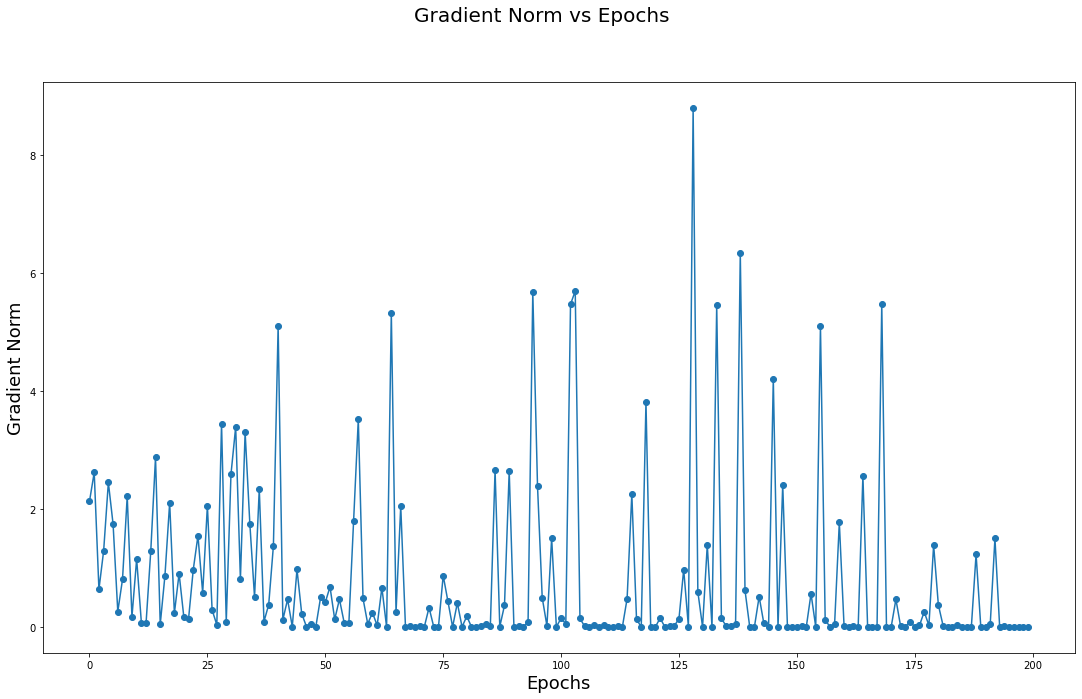

In [36]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
plt.plot(x,gradien_vector)
plt.savefig('Line_plot_gradient norm vs epochs.pdf')

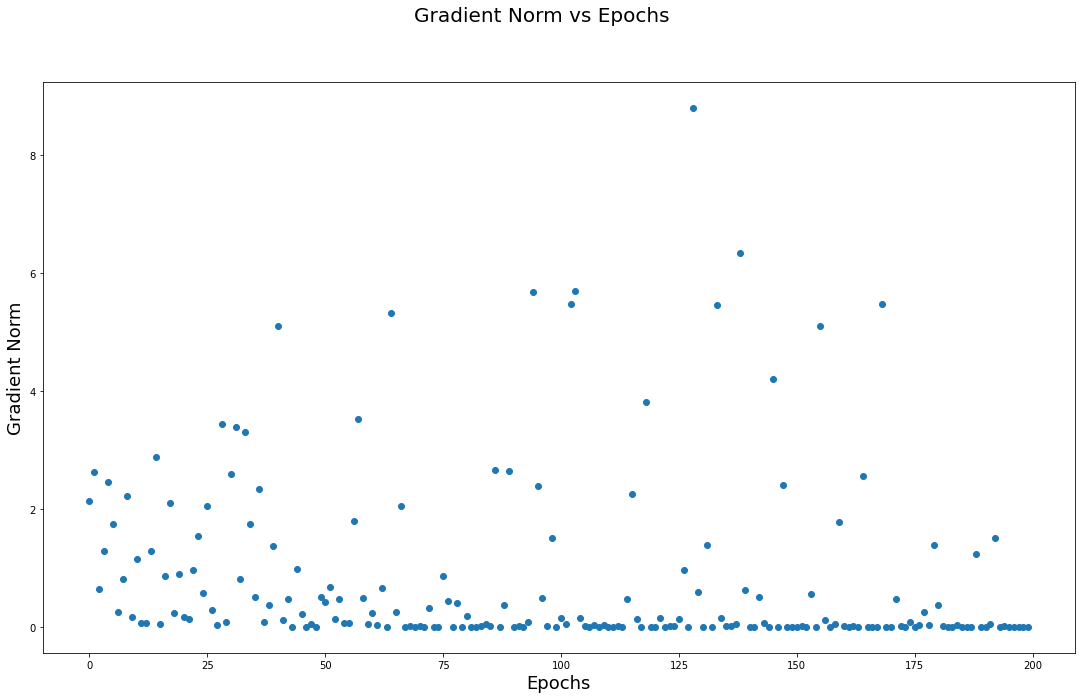

In [37]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
plt.savefig('scatterplot_gradient norm vs epochs.pdf')

In [12]:
len(g_2)

4

In [20]:
torch.stack(g_2)

RuntimeError: stack expects each tensor to be equal size, but got [45] at entry 0 and [450] at entry 1

In [25]:
a=torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)

In [26]:
a.shape

torch.Size([50495])

In [28]:
print(g_2[0].shape,g_2[1].shape,g_2[2].shape,g_2[3].shape)

torch.Size([45]) torch.Size([450]) torch.Size([49000]) torch.Size([1000])


In [29]:
torch.norm(a)

tensor(0.8766, device='cuda:0')